#### packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [5]:
df_copy = df.copy()

In [23]:
daegu = df_copy[df_copy['사업체지역']=='대구'].copy()

model_1 = sm.Logit.from_formula('''LongWork2 ~ C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(보험가입여부,Treatment('가입하지않음'))''', daegu).fit()
print('==================================Model Summary=========================================')
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.440672
         Iterations 6
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01782
Time:                        20:01:15   Log-Likelihood:                -125.15
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.1032
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.8578      0.239     -7.763      0.000      -2.327      -1.389
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.7541      0.404      1.868      0.062      -0.037       1.545
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.1939      0.338      0.574      0.566      -0.468       0.856
==================================================================================================================
"""

In [24]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_1 = pd.DataFrame(
    {
        "OR": model_1.params,
        "Lower CI": model_1.conf_int()[0],
        "Upper CI": model_1.conf_int()[1],
    }
)
odds_ratios_1 = np.exp(odds_ratios_1)
odds_ratios_1

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.15601,0.09760,0.24938
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.12565,0.96341,4.68999
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.21393,0.62629,2.35297


In [26]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    +  C(보험가입여부,Treatment('가입하지않음')) + 주당근로시간''', daegu).fit()
print('==================================Model Summary=========================================')
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.440554
         Iterations 6
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      280
Method:                           MLE   Df Model:                            3
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01808
Time:                        20:05:49   Log-Likelihood:                -125.12
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.2028
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.9622      0.473     -4.152      0.000      -2.888      -1.036
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.7457      0.405      1.842      0.065      -0.048       1.539
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.1486      0.379      0.392      0.695      -0.594       0.891
주당근로시간                                             0.0038      0.015      0.259      0.796      -0.025       0.032
==================================================================================================================
"""

In [27]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_2 = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios_2 = np.exp(odds_ratios_2)
odds_ratios_2

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.14055,0.05567,0.35487
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.10786,0.95347,4.65994
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.16026,0.55205,2.43857
주당근로시간,1.00379,0.97543,1.03298


In [28]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(보험가입여부,Treatment('가입하지않음'))
    + 주당근로시간 + C(직장만족도,Treatment('그렇지않다'))''', daegu).fit()
print('==================================Model Summary=========================================')
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.410624
         Iterations 7
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      278
Method:                           MLE   Df Model:                            5
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.08479
Time:                        20:06:40   Log-Likelihood:                -116.62
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                 0.0006214
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -3.7205      0.882     -4.219      0.000      -5.449      -1.992
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.4160      0.424      0.982      0.326      -0.414       1.246
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.2130      0.396      0.538      0.590      -0.563       0.989
C(직장만족도, Treatment('그렇지않다'))[T.그렇다]                2.2234      0.759      2.931      0.003       0.737       3.710
C(직장만족도, Treatment('그렇지않다'))[T.보통이다]               1.2423      0.778      1.596      0.110      -0.283       2.768
주당근로시간                                             0.0091      0.015      0.606      0.545      -0.020       0.039
==================================================================================================================
"""

In [12]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.04684,0.03267,0.06716
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.26798,1.86713,2.75489
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.06050,0.87850,1.28021
"C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",3.68512,2.81173,4.82981
"C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",1.65880,1.24400,2.21191
주당근로시간,1.00403,0.99675,1.01137


In [13]:
odds_ratios_3.index

Index(['Intercept', 'C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]',
       'C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]',
       'C(직장만족도, Treatment('그렇지않다'))[T.그렇다]',
       'C(직장만족도, Treatment('그렇지않다'))[T.보통이다]', '주당근로시간'],
      dtype='object')

In [14]:
odds_ratios_3.index = ['절편', '직장에서의복리후생제공여부, REF:제공하지않는다|제공한다',
       '보험가입여부, REF:가입하지않음|가입했다',
       '직장만족도, REF:그렇지않다|그렇다',
       '직장만족도, REF:그렇지않다:보통이다', '주당근로시간']

In [15]:
odds_ratios_3['label'] = odds_ratios_3.index
odds_ratios_3.shape

(6, 4)

In [16]:
odds_ratios_3['group'] = ['절편', '직장에서의복리후생제공여부',
       '보험가입여부',
       '직장만족도',
       '직장만족도', '주당근로시간']

In [17]:
odds_ratios_3.head(3)

,OR,Lower CI,Upper CI,label,group
절편,0.04684,0.03267,0.06716,절편,절편
"직장에서의복리후생제공여부, REF:제공하지않는다|제공한다",2.26798,1.86713,2.75489,"직장에서의복리후생제공여부, REF:제공하지않는다|제공한다",직장에서의복리후생제공여부
"보험가입여부, REF:가입하지않음|가입했다",1.06050,0.87850,1.28021,"보험가입여부, REF:가입하지않음|가입했다",보험가입여부


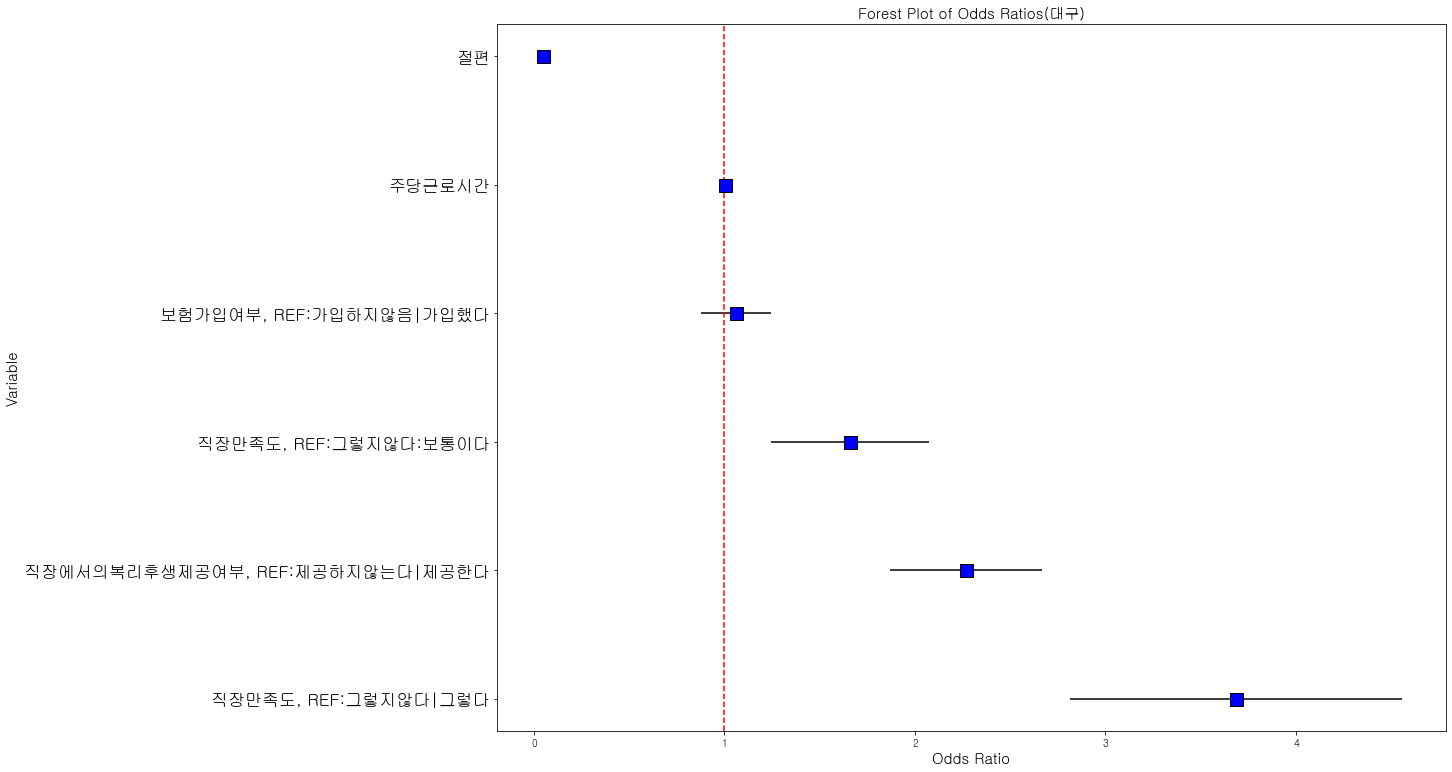

In [29]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(대구)', fontsize=15)

# Show the plot
plt.show()

#### Using Forest plot packages

![Example Image](https://raw.githubusercontent.com/LSYS/forestplot/main/docs/images/main.png)

##### 단변-------------

In [30]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    ''', daegu).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.441252
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01653
Time:                        20:08:38   Log-Likelihood:                -125.32
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                   0.04014
                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.16990,0.11873,0.24312
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.27834,1.06913,4.85519


In [32]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    C(보험가입여부,Treatment('가입하지않음'))
    ''', daegu).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.446473
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.004890
Time:                        20:09:24   Log-Likelihood:                -126.80
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.2643
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.16535,0.10421,0.26238
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.42944,0.76194,2.68168


In [33]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
   주당근로시간''', daegu).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.447315
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.003014
Time:                        20:10:51   Log-Likelihood:                -127.04
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                    0.3808
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.98

,OR,Lower CI,Upper CI
Intercept,0.13715,0.05543,0.33940
주당근로시간,1.01088,0.98641,1.03595


In [35]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    C(직장만족도,Treatment('그렇지않다'))''', daegu).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.416070
         Iterations 7
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                  284
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.07265
Time:                        20:11:20   Log-Likelihood:                -118.16
converged:                       True   LL-Null:                       -127.42
Covariance Type:            nonrobust   LLR p-value:                 9.538e-05
                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.04000,0.00973,0.16439
"C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",9.33735,2.14190,40.70511
"C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",3.36538,0.73642,15.37963
